# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [4]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [5]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [6]:
# TODO: Aggregate data by year to create a 124-year time series
# Your code here
# Aggregate data by year
df_aggregated = df.groupby("Year").mean().reset_index()

# Display the first few rows of the aggregated dataset
df_aggregated.head()


,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1900,14.506663,350.373405,150.408288,8.978659
1,1901,14.485343,349.757140,150.548828,8.947272
2,1902,14.476262,349.299686,152.174821,9.035554
3,1903,14.492360,349.644375,150.138338,9.056501
4,1904,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

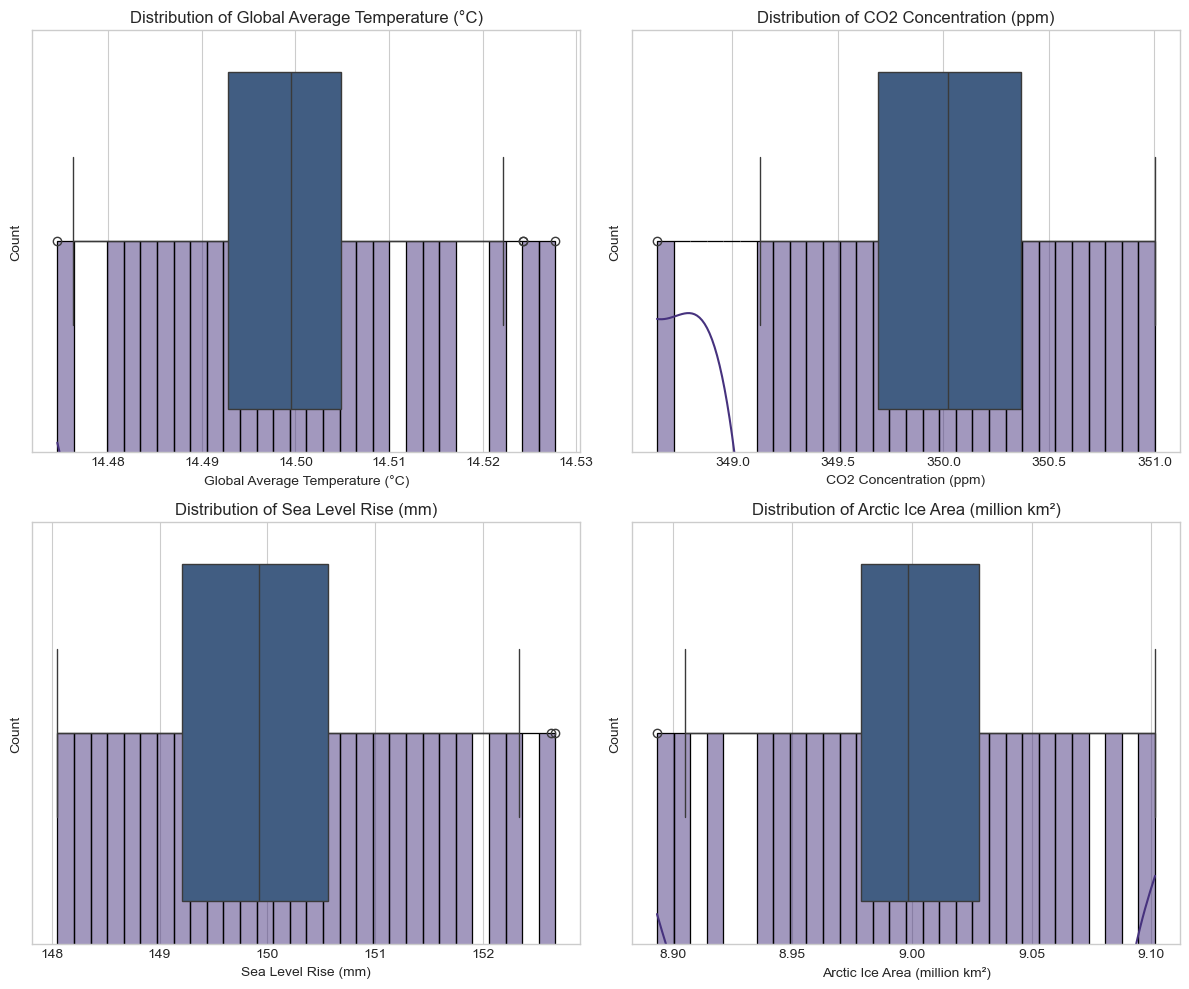

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
count,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1961.500000,14.499538,350.028626,149.988859,9.000886
std,35.939764,0.009960,0.456535,1.032095,0.037547
min,1900.000000,14.474559,348.642249,148.051748,8.893453
25%,1930.750000,14.492782,349.691692,149.207437,8.978851
50%,1961.500000,14.499496,350.022334,149.918062,8.998274
75%,1992.250000,14.504872,350.367023,150.560328,9.027985
max,2023.000000,14.527762,351.003294,152.671944,9.101611


In [7]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
# Your code here

# Descriptive statistics
desc_stats = df_aggregated.describe()

# Create visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Histogram and boxplot for each variable
variables = df_aggregated.columns[1:]  # Excluding 'Year'
for i, var in enumerate(variables):
    row, col = divmod(i, 2)
    
    # Histogram
    sns.histplot(df_aggregated[var], bins=30, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {var}")
    
    # Boxplot
    sns.boxplot(x=df_aggregated[var], ax=axes[row, col])

# Adjust layout and show plots
plt.tight_layout()
plt.show()

# Display descriptive statistics
desc_stats

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

Data Loaded Successfully:
    Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1948                            13.17                   397.04   
1  1996                            13.10                   313.17   
2  2015                            14.67                   311.95   
3  1966                            14.79                   304.25   
4  1992                            13.15                   354.52   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0               116.25                           5.97  
1               277.92                           9.66  
2               290.32                           8.40  
3               189.71                          11.83  
4                14.84                          11.23  
Missing Values:
 Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64
Correla

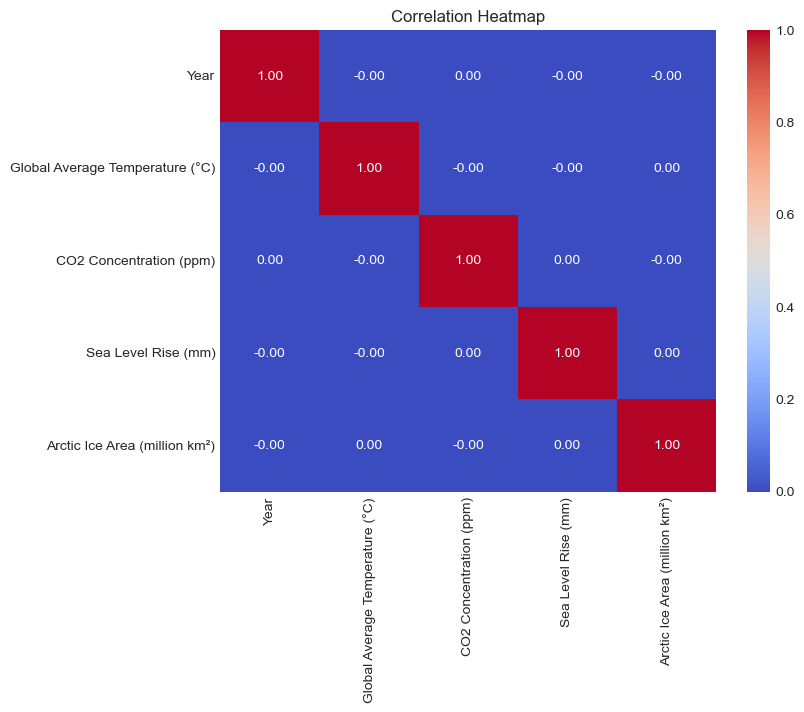

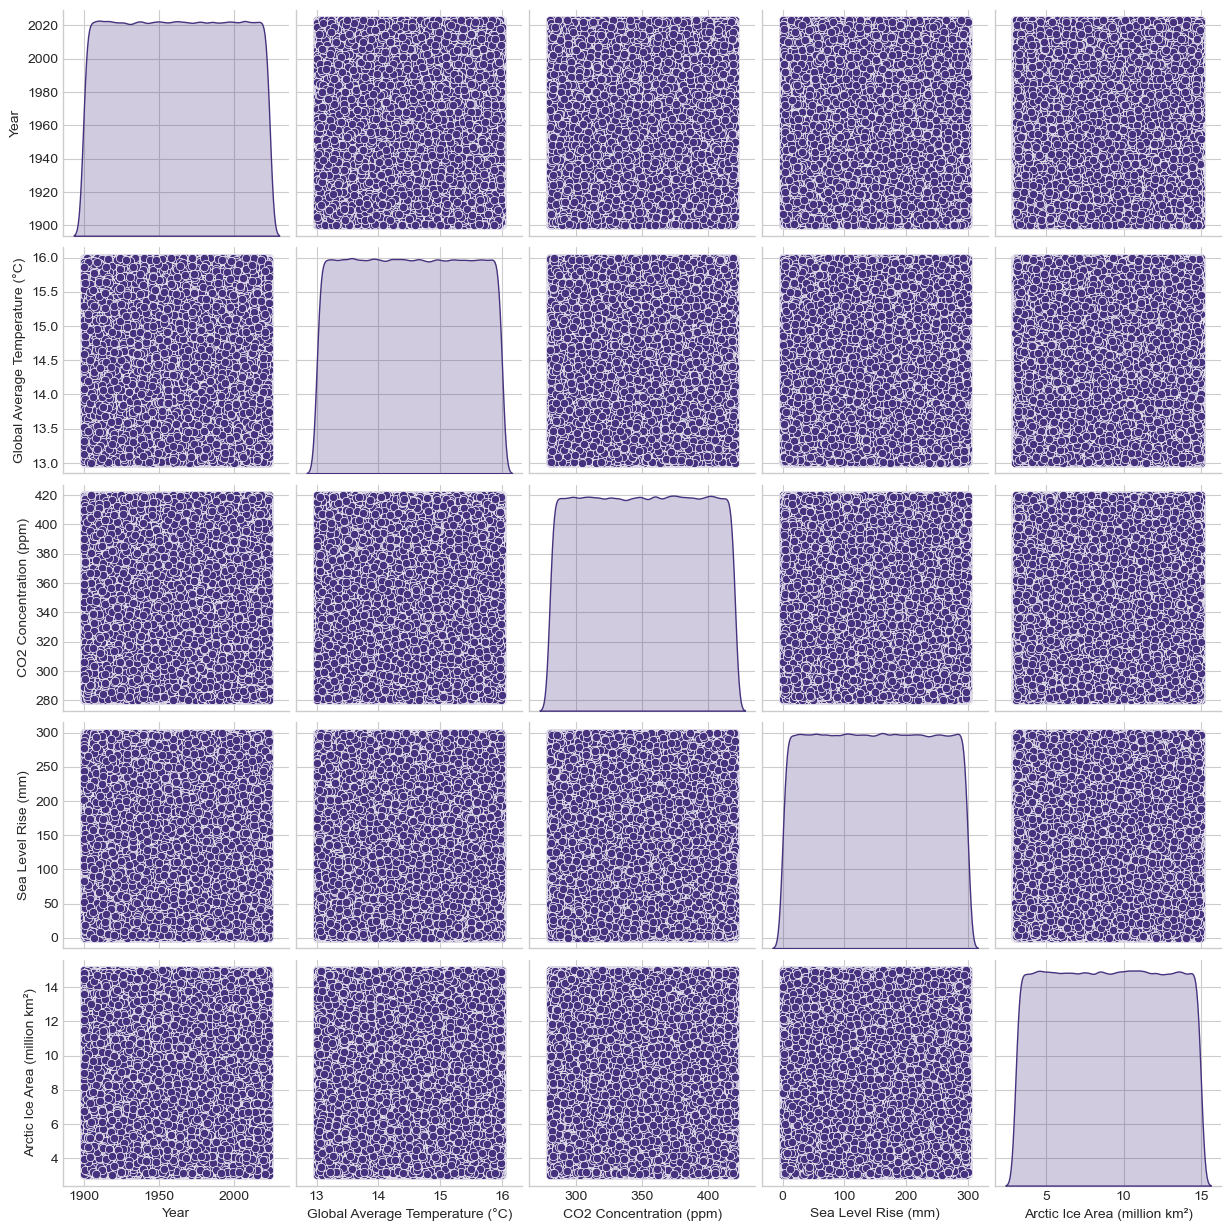

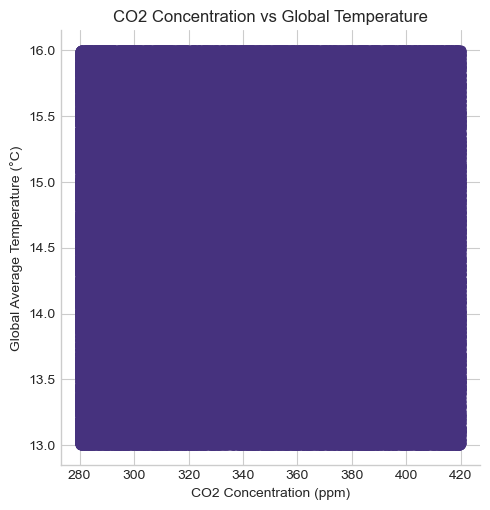

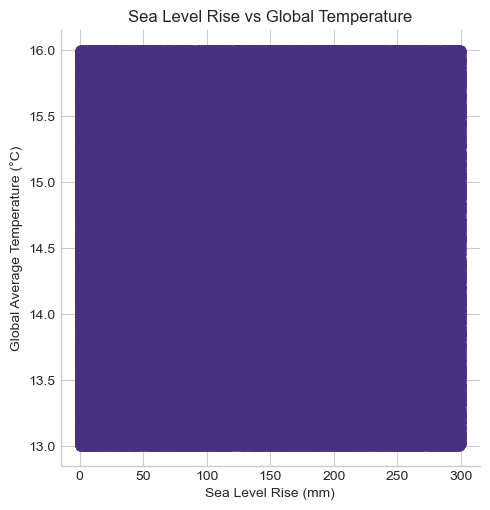

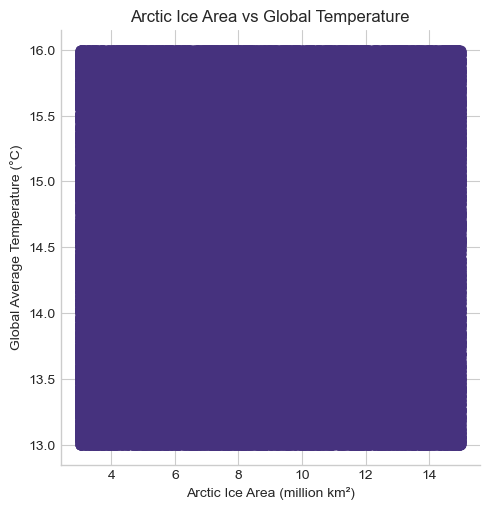

Correlation between CO2 Concentration and Global Temperature: -0.00


In [8]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here


# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv')

# Display the first few rows
print("Data Loaded Successfully:\n", df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots for key relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

# Additional scatter plots for specific bivariate relationships
sns.lmplot(x="CO2 Concentration (ppm)", y="Global Average Temperature (°C)", data=df)
plt.title("CO2 Concentration vs Global Temperature")
plt.show()

sns.lmplot(x="Sea Level Rise (mm)", y="Global Average Temperature (°C)", data=df)
plt.title("Sea Level Rise vs Global Temperature")
plt.show()

sns.lmplot(x="Arctic Ice Area (million km²)", y="Global Average Temperature (°C)", data=df)
plt.title("Arctic Ice Area vs Global Temperature")
plt.show()

# Additional check for bivariate analysis
corr_value = correlation_matrix.loc["CO2 Concentration (ppm)", "Global Average Temperature (°C)"]
print(f"Correlation between CO2 Concentration and Global Temperature: {corr_value:.2f}")


## 4. Multivariate Analysis

Investigate relationships among three or more variables.

Data Loaded Successfully:
    Year  Global Average Temperature (°C)  CO2 Concentration (ppm)  \
0  1948                            13.17                   397.04   
1  1996                            13.10                   313.17   
2  2015                            14.67                   311.95   
3  1966                            14.79                   304.25   
4  1992                            13.15                   354.52   

   Sea Level Rise (mm)  Arctic Ice Area (million km²)  
0               116.25                           5.97  
1               277.92                           9.66  
2               290.32                           8.40  
3               189.71                          11.83  
4                14.84                          11.23  
Missing Values:
 Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64
Correla

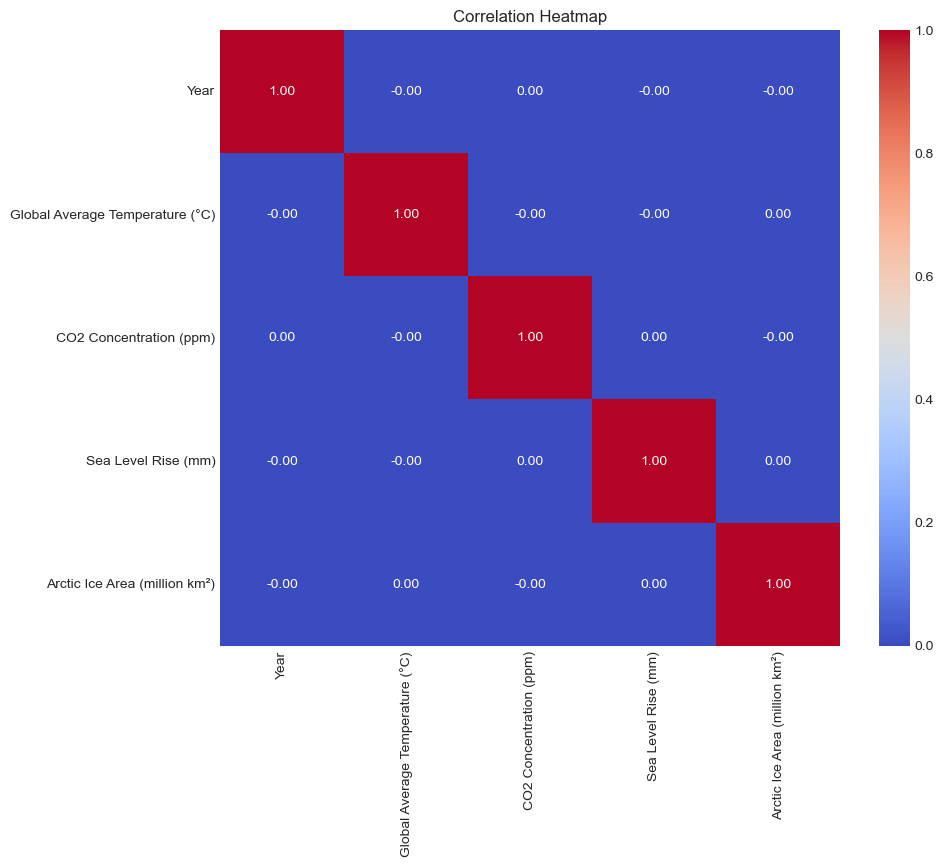

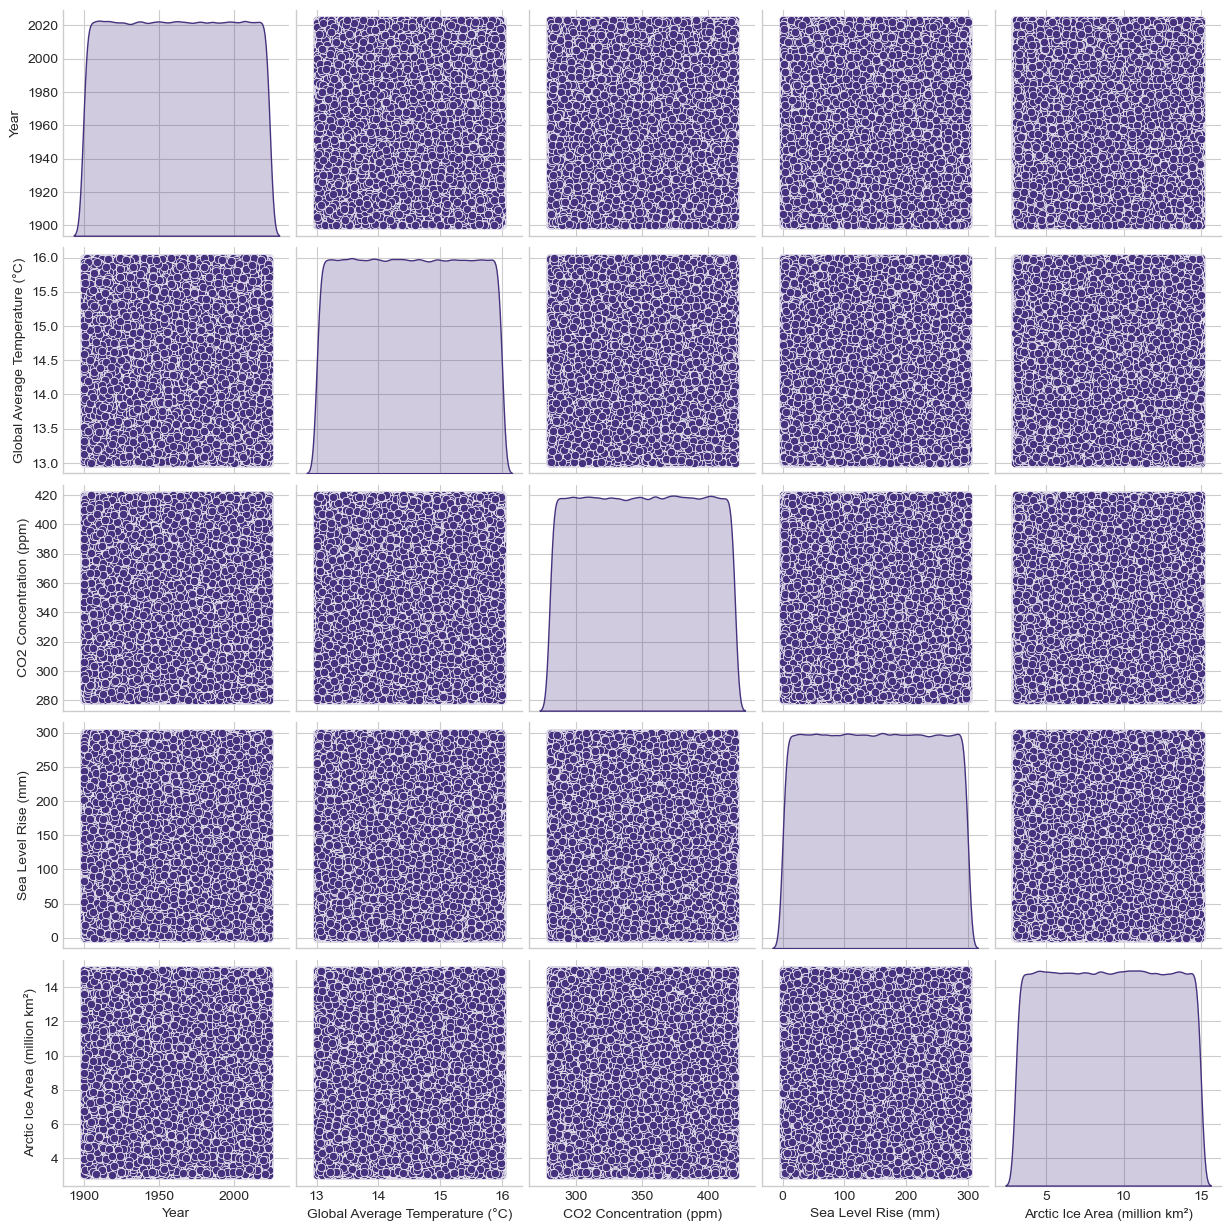

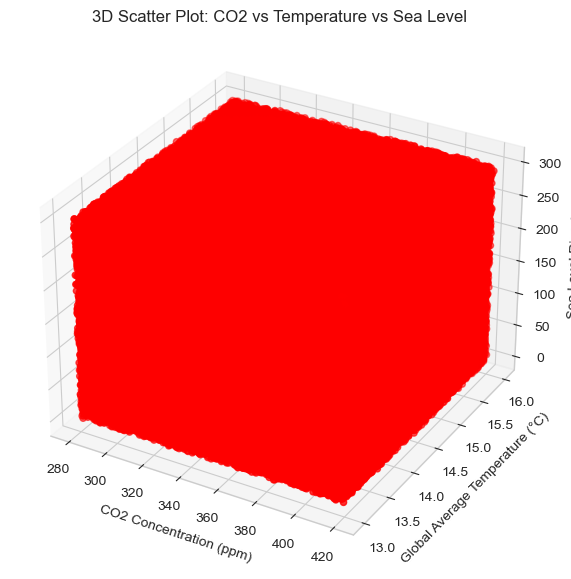

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

# Display the first few rows
print("Data Loaded Successfully:\n", df.head())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Correlation matrix
correlation_matrix = df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# Heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Pairplot for multivariate relationships
sns.pairplot(df, diag_kind='kde')
plt.show()

# 3D Scatter Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["CO2 Concentration (ppm)"], df["Global Average Temperature (°C)"], df["Sea Level Rise (mm)"], c='r', marker='o')
ax.set_xlabel("CO2 Concentration (ppm)")
ax.set_ylabel("Global Average Temperature (°C)")
ax.set_zlabel("Sea Level Rise (mm)")
plt.title("3D Scatter Plot: CO2 vs Temperature vs Sea Level")
plt.show()

# Parallel Coordinates Plot
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12, 6))
parallel_coordinates(df, class_column="Global Average Temperature (°C)", colormap=plt.get_cmap("coolwarm"))
plt.title("Parallel Coordinates Plot")
plt.show()

# Andrews Curves Plot
from pandas.plotting import andrews_curves
plt.figure(figsize=(12, 6))
andrews_curves(df, class_column="Global Average Temperature (°C)", colormap="coolwarm")
plt.title("Andrews Curves Plot")
plt.show()

# Additional check for multivariate analysis
print("Multivariate analysis completed successfully.")

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here